<a href="https://colab.research.google.com/github/Aryanthakur2/one-click-hugo-cms/blob/master/cats%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 38.0MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
   )
validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
   )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#bormalise
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 111ms/step - loss: 1.1218 - accuracy: 0.5974 - val_loss: 0.5902 - val_accuracy: 0.6752
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5436 - accuracy: 0.7273 - val_loss: 0.5101 - val_accuracy: 0.7656
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4626 - accuracy: 0.7826 - val_loss: 0.4827 - val_accuracy: 0.7708
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4119 - accuracy: 0.8176 - val_loss: 0.5319 - val_accuracy: 0.7784
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3350 - accuracy: 0.8537 - val_loss: 0.5451 - val_accuracy: 0.7576
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2623 - accuracy: 0.8906 - val_loss: 0.7151 - val_accuracy: 0.6812
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1962 - accuracy: 0.9218 - val_loss: 0.5376 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

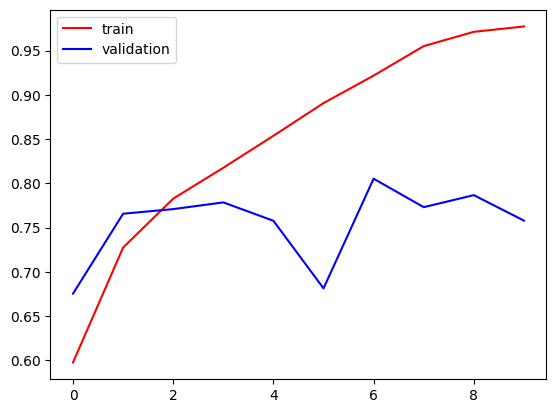

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show

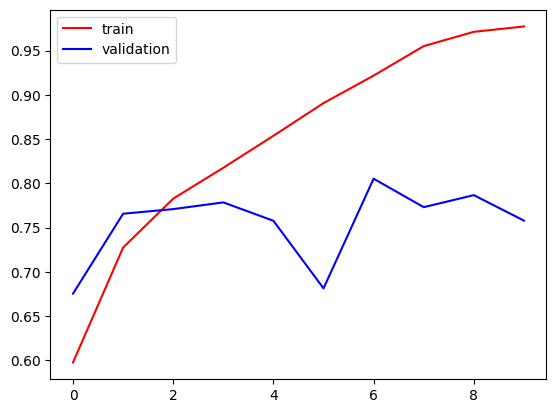

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

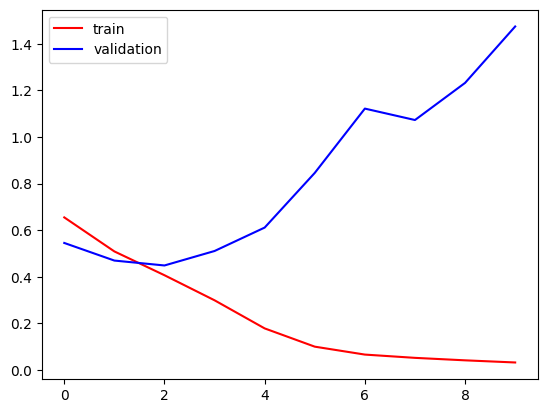

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

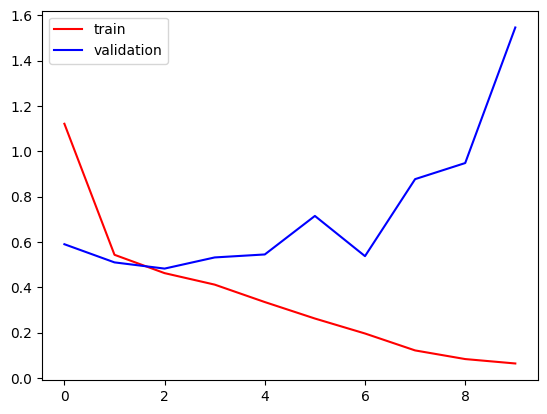

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [43]:
test_image= cv2.imread('/content/Cat_November_2010-1a.jpg')

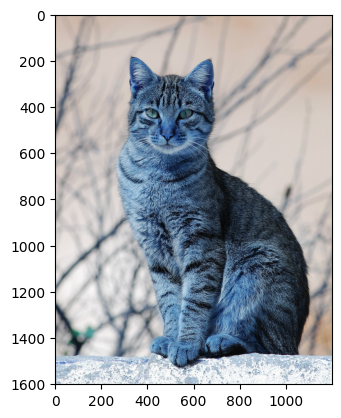

In [44]:
plt.imshow(test_image)

In [45]:
test_image.shape

(1602, 1200, 3)

In [46]:
test_image=cv2.resize(test_image,(256,256))

In [47]:
test_input = test_image.reshape(1,256,256,3)

In [48]:
model.predict(test_input)

1/1 [==============================] - 0s 463ms/step


array([[1.]], dtype=float32)

SyntaxError: invalid syntax (<ipython-input-49-791eff7d0ad9>, line 1)